In [1]:
import numpy as np
import pandas as pd

In [ ]:
!pip install mlxtend

In [2]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

df = pd.read_csv(path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# lets peek at the data
df.drop([0], axis=1).describe()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
from sklearn.preprocessing import LabelEncoder

X = df.drop([0, 1], axis=1).values
y = df[1].values

# Encode labels 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

print(encoder.classes_, encoder.transform(['B', 'M']))

['B' 'M'] [0 1]


In [5]:
from sklearn.model_selection import train_test_split

# stratified train_test_splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1) #stratify helps sampling in a balanced way.

# 1) Confusion Matrix

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# using z-score normalization (zero-mean, unit variance)
scaler = StandardScaler()
# find training set statistics, and normalize the training set
X_train = scaler.fit_transform(X_train) #by using fit function I am only learning the statistics of X_train. Then I say use those statistics to transform X_train. We train data by saying fit. So we do not 'fit' test data
# normalize the test set using training set statistics
X_test = scaler.transform(X_test)

# create a KNN classifier and fit the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# look at the true/miss classification
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

[[71  1]
 [ 3 39]]


Multiclass confusion matrix

In [7]:
# create ground truths and predictions with 4 classes
y_target = [1, 1, 1, 0, 0, 2, 0, 3]
y_predicted = [1, 0, 1, 0, 0, 2, 1, 3]

cm = confusion_matrix(y_true=y_target, y_pred=y_predicted)
print(cm)

[[2 1 0 0]
 [1 2 0 0]
 [0 0 1 0]
 [0 0 0 1]]


Visualizing a Confusion Matrix

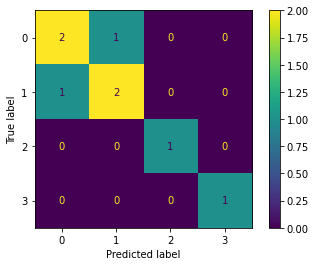

In [8]:
# From predictions
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_true=y_target, y_pred=y_predicted)

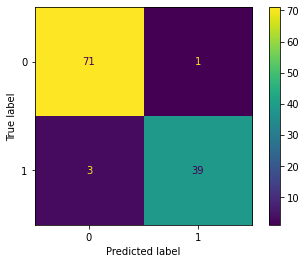

In [9]:
# From estimator
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

# 2) Precision, Recall, F1 Score

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# trade-off between precision and recall. When you decrease the threshold, FP will increase and Precision decrease. When you increase threshold, FN will decrease and Recall will be low.

print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=y_pred))

Accuracy: 0.965
Precision: 0.975
Recall: 0.929
F1: 0.951
MCC: 0.925


# Using those Metrics in GridSearch

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

k_values = [3, 5, 7, 9, 15, 21, 31]
param_grid = {'kneighborsclassifier__n_neighbors': k_values, 'kneighborsclassifier__metric' : ['minkowski', 'euclidean', 'manhattan']}

# create a normalization pipeline
pipe_knn = make_pipeline(StandardScaler(), 
                         KNeighborsClassifier())

grid = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, scoring='f1', cv=10)

grid = grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9632575757575758
{'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3}


# Using binary metrics in multiclass problems

In [12]:
from sklearn.metrics import make_scorer
from mlxtend.data import iris_data

# Load iris data
X_iris, y_iris = iris_data()

# What does average='macro' argument do?
scorer = make_scorer(f1_score, average='macro')

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': k_values, 'metric' : ['minkowski', 'euclidean', 'manhattan']}
grid_iris = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=scorer, cv=10)

grid_iris.fit(X_iris, y_iris)
print(grid_iris.best_score_)
print(grid_iris.best_params_)

0.973063973063973
{'metric': 'minkowski', 'n_neighbors': 9}


# 3) ROC Receiver Operating Characteristics


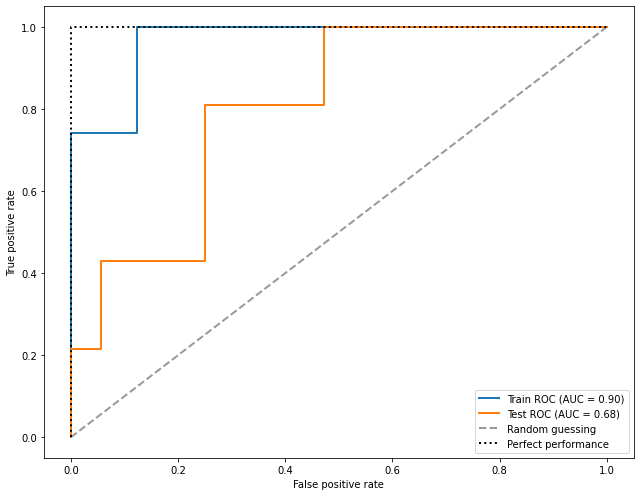

In [13]:
from sklearn.metrics import roc_curve, auc

knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

X_train_small = X_train[:, [4, 14]]

knn.fit(X_train_small, y_train)

fig = plt.figure(figsize=(9, 7))
# Plot ROC curve for training samples
train_probas = knn.predict_proba(X_train_small)

fpr, tpr, thresholds = roc_curve(y_train, train_probas[:, 1], pos_label=1) #for ROC, we need binary classifcaiton as we see the argument pos_label=1 and all the rest is 0
roc_auc = auc(fpr, tpr)

plt.step(fpr, tpr, label='Train ROC (AUC = {:.2f})'.format(roc_auc), lw=2)

# Plot ROC curve for testing samples
test_probas = knn.predict_proba(X_test[:, [4, 14]])

fpr, tpr, thresholds = roc_curve(y_test, test_probas[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.step(fpr, tpr, label='Test ROC (AUC = {:.2f})'.format(roc_auc), lw=2)

# Equal error line
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing',
         lw=2) # lw: linewidth

# Desired performance in ROC
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance',
         lw=2)


# Adjustments in the plot
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Avg. ROC of cross-validation folds 

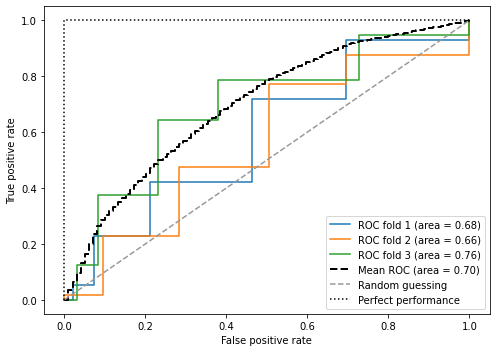

In [14]:
from sklearn.model_selection import StratifiedKFold

# create a normalization pipeline

pipe_knn = make_pipeline(StandardScaler(), 
                         KNeighborsClassifier())

X_train_small = X_train[:, [4, 14]]

cv = list(StratifiedKFold(n_splits=3,
                          shuffle=True,
                          random_state=1).split(X_train_small, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train_indices, test_indices) in enumerate(cv):
  pipe_knn.fit(X_train_small[train_indices], y_train[train_indices])
  probas = pipe_knn.predict_proba(X_train_small[test_indices])

  fpr, tpr, thresholds = roc_curve(y_train[test_indices],
                                   probas[:, 1],
                                   pos_label=1)
  # Plot the fold ROC
  roc_auc = auc(fpr, tpr)
  plt.step(fpr, tpr, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc), where='post')

  # update avg. mean_tpr
  mean_tpr += np.interp(mean_fpr, fpr, tpr)

mean_tpr /= len(cv)
mean_tpr[0] = 0.0
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.step(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2, where='post')


plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

plt.step([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance', where='post')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

In choosing hyperparameters, I will consider mean ROC as my metric